In [2]:
#EDA

In [3]:
# importing the libraries

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from pandas.api.types import is_numeric_dtype
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import operator
import re

In [5]:
# importing the datasets
Book_ds=pd.read_csv('C:\\Users\\vaide\\Documents\\Files_p279\\Books.csv',encoding='latin-1')
user_ds=pd.read_csv('C:\\Users\\vaide\\Documents\\Files_p279\\Users.csv',encoding='latin-1')
rating_ds=pd.read_csv('C:\\Users\\vaide\\Documents\\Files_p279\\Ratings.csv',encoding='latin-1')
print(Book_ds)
print(user_ds)
print(rating_ds)

C:\Users\vaide\AppData\Local\Temp\ipykernel_8732\1299008678.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  Book_ds=pd.read_csv('C:\\Users\\vaide\\Documents\\Files_p279\\Books.csv',encoding='latin-1')


              ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford                2002   
1       Richard Bru

In [6]:
# collecting the information related to datasets
Book_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
user_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
rating_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [9]:
# determining the size of dataset
print('The size of book dataset:',Book_ds.shape)
print('The size of user dataset:',user_ds.shape)
print('The size of rating dataset:',user_ds.shape)

The size of book dataset: (271360, 8)
The size of user dataset: (278858, 3)
The size of rating dataset: (278858, 3)


In [10]:
# checking the null values from dataset
print('Book dataset \n:',Book_ds.isnull().sum())

Book dataset 
: ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [11]:
print('User dataset \n:',user_ds.isnull().sum())

User dataset 
: User-ID          0
Location         0
Age         110762
dtype: int64


In [12]:
print('Rating dataset \n:',rating_ds.isnull().sum())

Rating dataset 
: User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [13]:
# droppping the image url from book dataset
Book_ds.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True) 
Book_ds.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [14]:
# lets see the null values for book dataset
Book_ds.loc[Book_ds['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [15]:
Book_ds.loc[Book_ds['Publisher'].isnull(),:]
Book_ds.loc[Book_ds['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [16]:
# Trying to full null values from book dataset
Book_ds.at[187689 ,'Book-Author'] = 'Other'
Book_ds.at[128890 ,'Publisher'] = 'Other'
Book_ds.at[129037 ,'Publisher'] = 'Other'
print(Book_ds.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64


In [17]:
# Trying to fill null values from user dataset
required=user_ds[user_ds['Age']<=80]
required=required[required['Age']>=10]

mean=round(required['Age'].mean())
print(mean)

user_ds.loc[user_ds['Age'] > 80, 'Age'] = mean    
user_ds.loc[user_ds['Age'] < 10, 'Age'] = mean    
user_ds['Age'] = user_ds['Age'].fillna(mean)      
user_ds['Age'] = user_ds['Age'].astype(int)  

35


In [18]:
# checking for the null values
print('Book ds:\n',Book_ds.isnull().sum())
print()
print('User ds:\n',user_ds.isnull().sum())
print()
print('Rating ds:\n',rating_ds.isnull().sum())

Book ds:
 ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

User ds:
 User-ID     0
Location    0
Age         0
dtype: int64

Rating ds:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [19]:
# print datasets
Book_ds.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [20]:
user_ds.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",35
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",35
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",35


In [21]:
rating_ds.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [22]:
# counting the duplicated rows
Book_ds[Book_ds.duplicated()].shape

(0, 5)

In [23]:
user_ds[user_ds.duplicated()].shape

(0, 3)

In [24]:
rating_ds[rating_ds.duplicated()].shape

(0, 3)

In [25]:
# working on book dataset

In [26]:
# checking for column Year-of-publication
Book_ds['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [27]:
pd.set_option('display.max_colwidth', -1)
# pandas will display the full content of each cell in all columns

C:\Users\vaide\AppData\Local\Temp\ipykernel_8732\2643136670.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [28]:
Book_ds.loc[Book_ds['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [29]:
Book_ds.loc[Book_ds['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [30]:
Book_ds.loc[Book_ds['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [31]:
Book_ds.at[209538 ,'Publisher'] = 'DK Publishing Inc'
Book_ds.at[209538 ,'Year-Of-Publication'] = 2000
Book_ds.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
Book_ds.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

Book_ds.at[221678 ,'Publisher'] = 'DK Publishing Inc'
Book_ds.at[221678 ,'Year-Of-Publication'] = 2000
Book_ds.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
Book_ds.at[209538 ,'Book-Author'] = 'James Buckley'

Book_ds.at[220731 ,'Publisher'] = 'Gallimard'
Book_ds.at[220731 ,'Year-Of-Publication'] = '2003'
Book_ds.at[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
Book_ds.at[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [32]:
Book_ds['Year-Of-Publication'] = Book_ds['Year-Of-Publication'].astype(int)
print(sorted(list(Book_ds['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [33]:
count = Counter(Book_ds['Year-Of-Publication'])
[k for k, v in count.items() if v == max(count.values())]

[2002]

In [34]:
Book_ds.loc[Book_ds['Year-Of-Publication'] > 2021, 'Year-Of-Publication'] = 2002
Book_ds.loc[Book_ds['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = 2002

In [35]:
Book_ds.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [36]:
# here we are dropping the duplicate rows
Book_ds.drop_duplicates(keep='last', inplace=True) 
Book_ds.reset_index(drop = True, inplace = True)

In [37]:
# working on user dataset

In [38]:
user_ds.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",35
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",35
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",35


In [39]:
list_ = user_ds.Location.str.split(', ')

city = []
state = []
country = []
count_no_state = 0    
count_no_country = 0

for i in range(0,len(list_)):
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0]=='n/a' or list_[i][0] == ',': 
        city.append('other')
    else:
        city.append(list_[i][0].lower())

    if(len(list_[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1]=='n/a' or list_[i][1] == ',':   
            state.append('other')
            count_no_state += 1            
        else:
            state.append(list_[i][1].lower())
        
        if(len(list_[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            if list_[i][2] == ''or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(list_[i][2].lower())
        
user_ds = user_ds.drop('Location',axis=1)

temp = []
for ent in city:
    c = ent.split('/')            
    temp.append(c[0])

df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

user_ds = pd.concat([user_ds, df_city], axis=1)
user_ds = pd.concat([user_ds, df_state], axis=1)
user_ds = pd.concat([user_ds, df_country], axis=1)

print(count_no_country)    
print(count_no_state)   

4659
16044


In [40]:
# dropping the duplicate row
user_ds.drop_duplicates(keep='last', inplace=True)
user_ds.reset_index(drop=True, inplace=True)

In [41]:
user_ds.head()

,User-ID,Age,City,State,Country
0,1,35,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,35,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,35,farnborough,hants,united kingdom


In [42]:
# working on rating dataset

In [43]:
print("Columns: ", list(rating_ds.columns))
rating_ds.head()

Columns:  ['User-ID', 'ISBN', 'Book-Rating']


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [44]:
# to check whether ratings are numeric or not
print(is_numeric_dtype(rating_ds['Book-Rating']))

True


In [45]:
# to check whether user id is numeric or not
print(is_numeric_dtype(rating_ds['User-ID']))

True


In [46]:
flag = 0
k =[]
reg = "[^A-Za-z0-9]"

for x in rating_ds['ISBN']:
    z = re.search(reg,x)    
    if z:
        flag = 1

if flag == 1:
    print("False")
else:
    print("True")

False


In [47]:
# removing extra characters
bookISBN = Book_ds['ISBN'].tolist() 
reg = "[^A-Za-z0-9]" 
for index, row_Value in rating_ds.iterrows():
    z = re.search(reg, row_Value['ISBN'])    
    if z:
        f = re.sub(reg,"",row_Value['ISBN'])
        if f in bookISBN:
            rating_ds.at[index , 'ISBN'] = f

In [48]:
# converting in upper case
rating_ds['ISBN'] = rating_ds['ISBN'].str.upper()

In [49]:
# dropping the duplicate rows
rating_ds.drop_duplicates(keep='last', inplace=True)
rating_ds.reset_index(drop=True, inplace=True)

In [50]:
rating_ds.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [51]:
# data visualization

<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

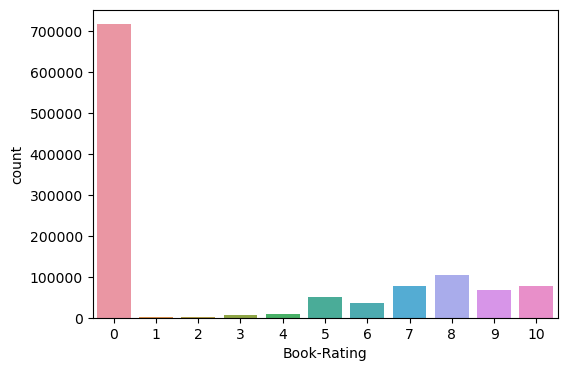

In [52]:
plt.figure(figsize=(6,4))
sns.countplot(x="Book-Rating", data=rating_ds)

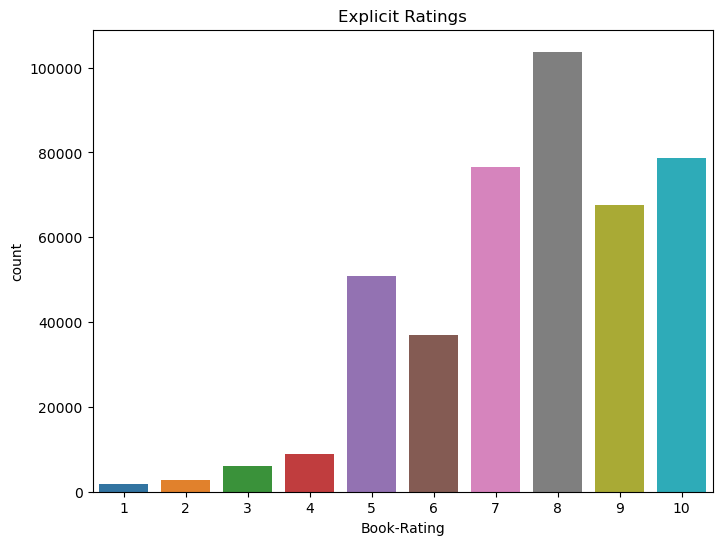

In [53]:
# explicit rating
plt.figure(figsize=(8,6))
data = rating_ds[rating_ds['Book-Rating'] != 0]
sns.countplot(x="Book-Rating", data=data)
plt.title("Explicit Ratings")
plt.show()

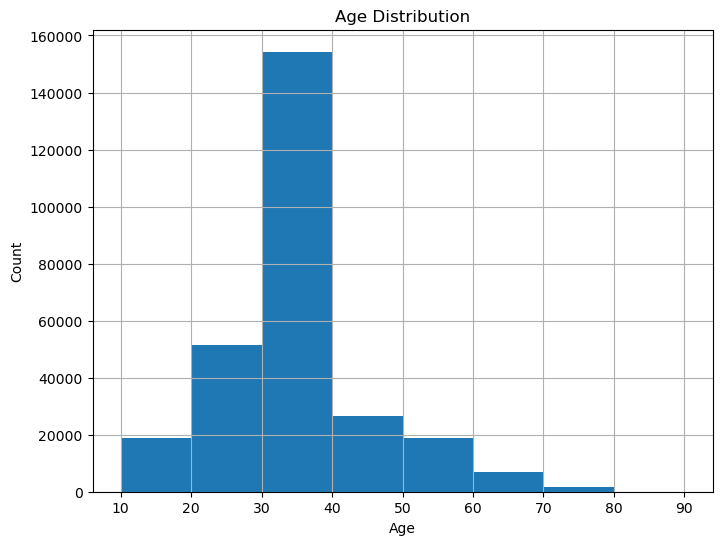

In [54]:
plt.figure(figsize=(8,6))
user_ds.Age.hist(bins=[10*i for i in range(1, 10)])     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

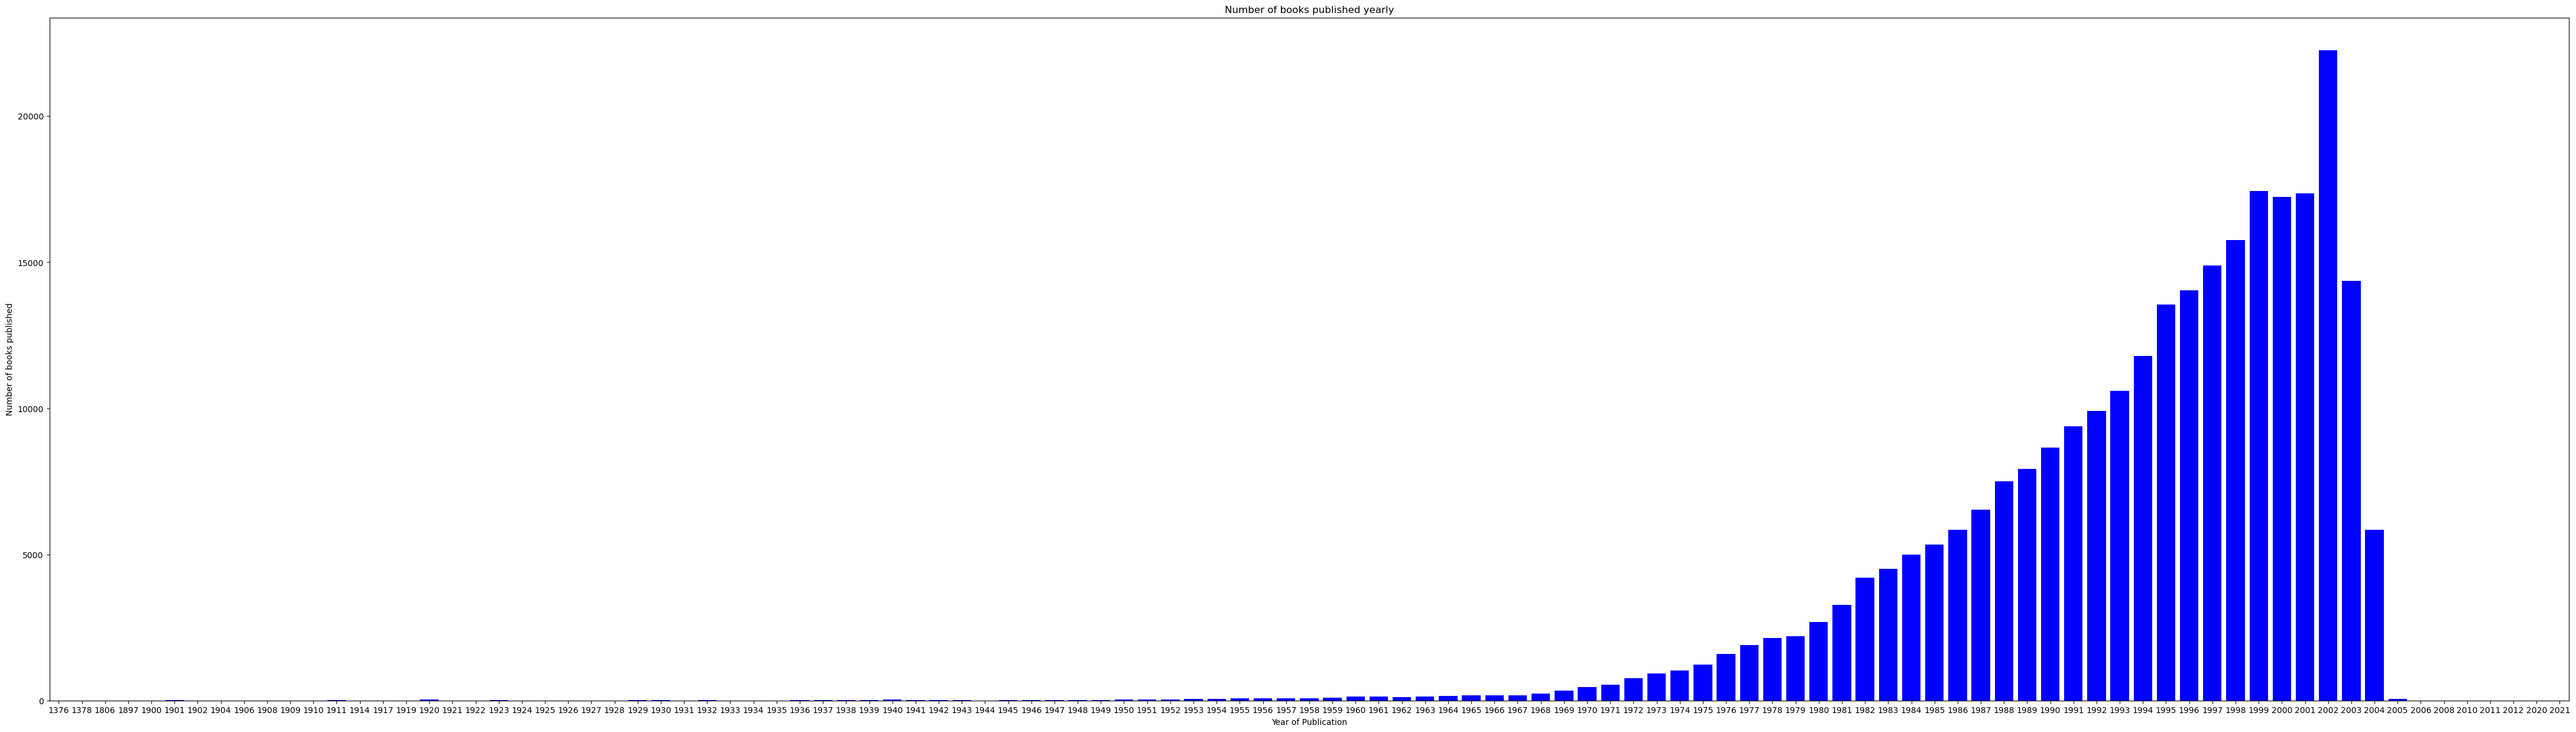

In [55]:
publications = {}
for year in Book_ds['Year-Of-Publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

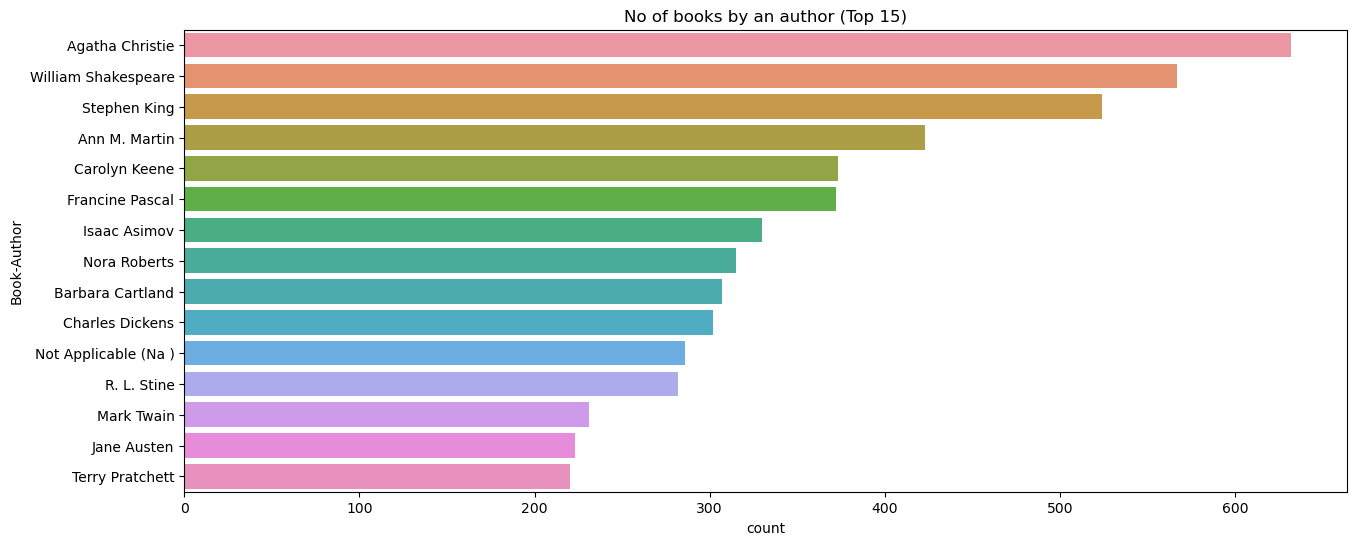

In [56]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.countplot(y="Book-Author", data=Book_ds,order=Book_ds['Book-Author'].value_counts().index[0:15])
plt.title("No of books by an author (Top 15)")
plt.show()

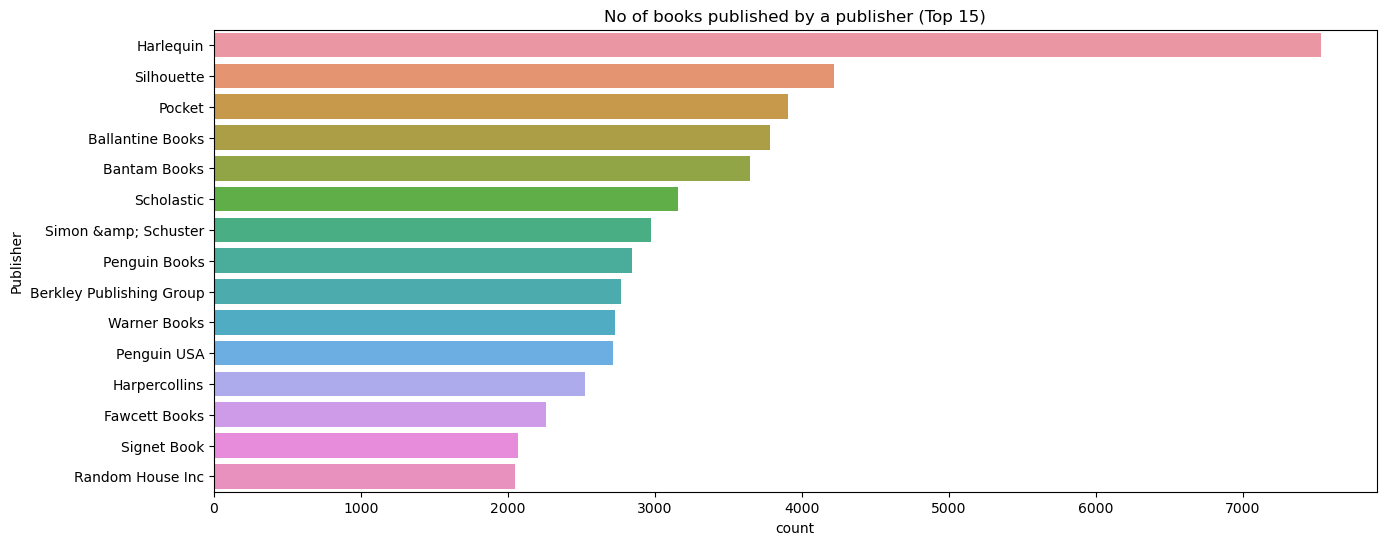

In [57]:
plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=Book_ds,order=Book_ds['Publisher'].value_counts().index[0:15])
plt.title("No of books published by a publisher (Top 15)")
plt.show()

In [58]:
# merging all the 3 datsets

In [59]:
dataset = pd.merge(Book_ds, rating_ds, on='ISBN', how='inner')
dataset = pd.merge(dataset, user_ds, on='User-ID', how='inner')
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031364 entries, 0 to 1031363
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1031364 non-null  object
 1   Book-Title           1031364 non-null  object
 2   Book-Author          1031364 non-null  object
 3   Year-Of-Publication  1031364 non-null  int32 
 4   Publisher            1031364 non-null  object
 5   User-ID              1031364 non-null  int64 
 6   Book-Rating          1031364 non-null  int64 
 7   Age                  1031364 non-null  int32 
 8   City                 1031364 non-null  object
 9   State                1031364 non-null  object
 10  Country              1031364 non-null  object
dtypes: int32(2), int64(2), object(7)
memory usage: 86.6+ MB


In [60]:
dataset.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,35,timmins,ontario,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,35,timmins,ontario,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,35,timmins,ontario,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,35,timmins,ontario,canada


In [61]:
# explicit rating data set
dataset1 = dataset[dataset['Book-Rating'] != 0]
dataset1 = dataset1.reset_index(drop = True)
dataset1.shape

(383981, 11)

In [62]:
# implicit rating data set
dataset2 = dataset[dataset['Book-Rating'] == 0]
dataset2 = dataset2.reset_index(drop = True)
dataset2.shape

(647383, 11)

In [63]:
dataset1.head() # explicit

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,City,State,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,35,timmins,ontario,canada
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5,35,timmins,ontario,canada
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,8,5,35,timmins,ontario,canada
3,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,8,5,35,timmins,ontario,canada
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,8,6,35,timmins,ontario,canada


In [64]:
dataset2.head() #implicit

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18,stockton,california,usa
1,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,35,timmins,ontario,canada
2,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,35,timmins,ontario,canada
3,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,35,timmins,ontario,canada
4,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8,0,35,timmins,ontario,canada


In [65]:
# data visualization

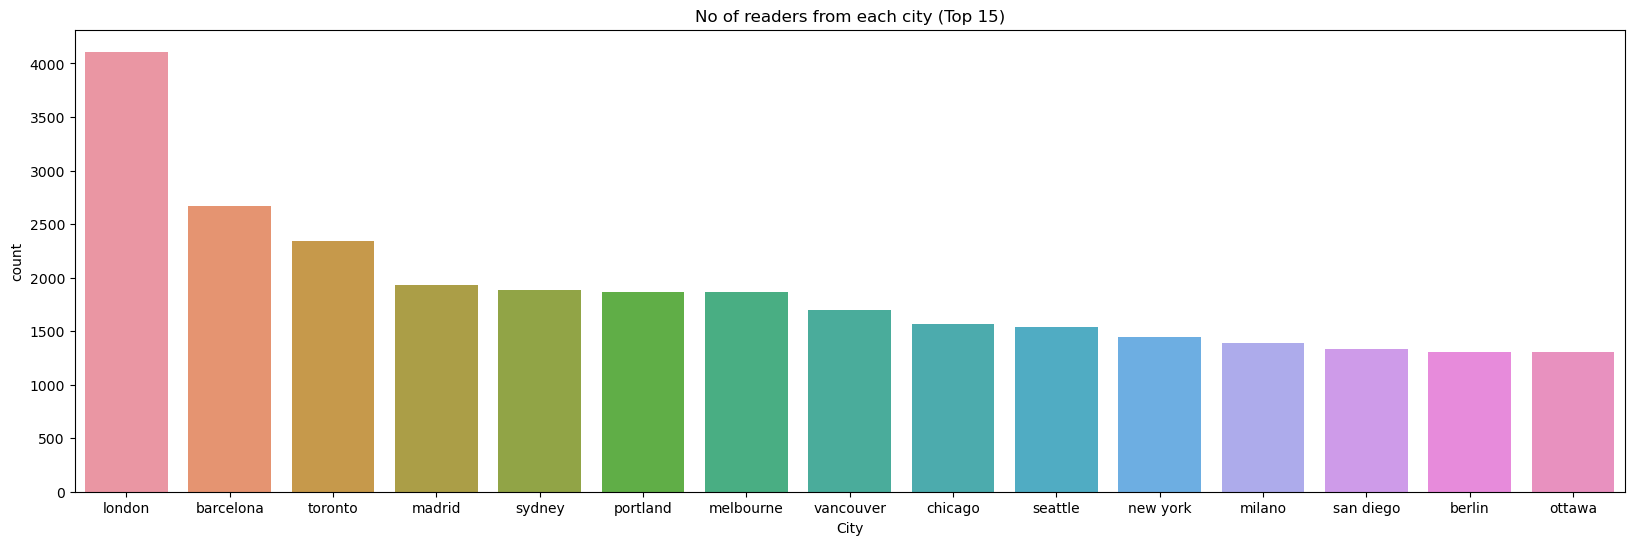

In [66]:
plt.figure(figsize=(20,6))
sns.countplot(x="City", data=user_ds,order=user_ds['City'].value_counts().index[0:15])
plt.title("No of readers from each city (Top 15)")
plt.show()

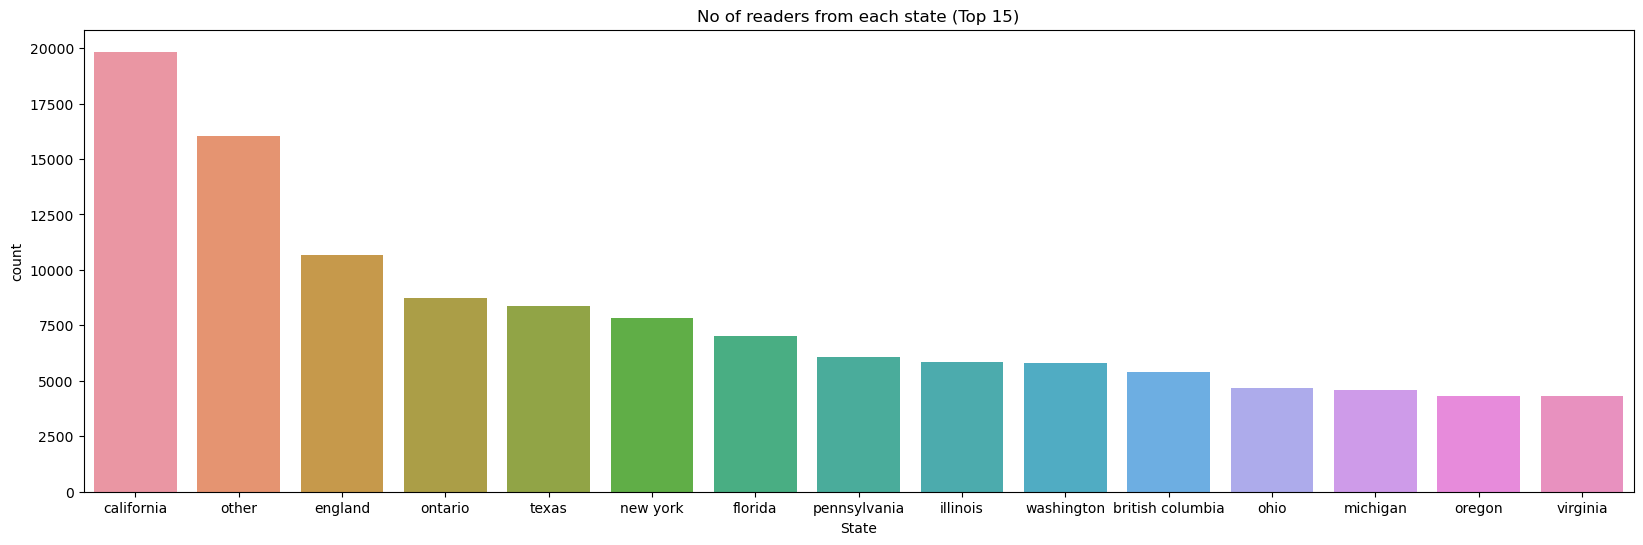

In [67]:
plt.figure(figsize=(20,6))
sns.countplot(x="State", data=user_ds,order=user_ds['State'].value_counts().index[0:15])
plt.title("No of readers from each state (Top 15)")
plt.show()

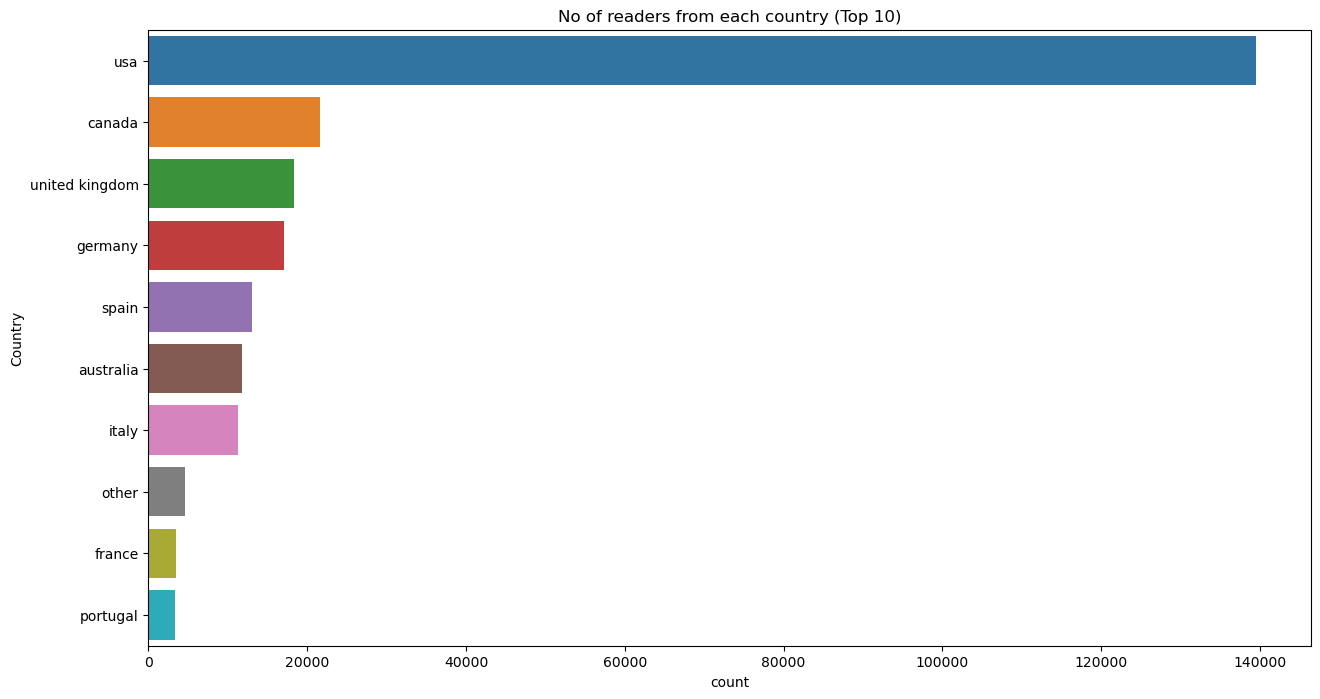

In [68]:
plt.figure(figsize=(15,8))
sns.countplot(y="Country", data=user_ds, order=user_ds['Country'].value_counts().index[0:10])
plt.title("No of readers from each country (Top 10)")
plt.show()

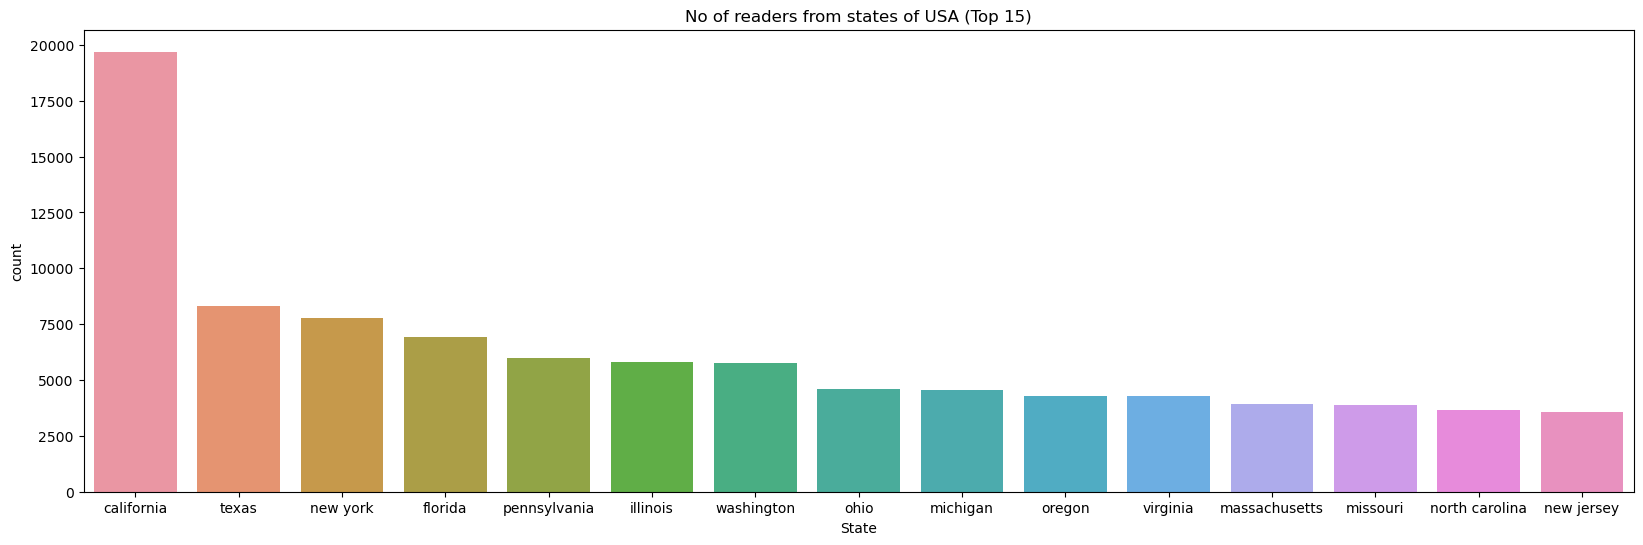

In [69]:
data=user_ds[user_ds['Country']=='usa']
plt.figure(figsize=(20,6))
sns.countplot(x="State", data=data,order=data['State'].value_counts().index[0:15])
plt.title("No of readers from states of USA (Top 15)")
plt.show()

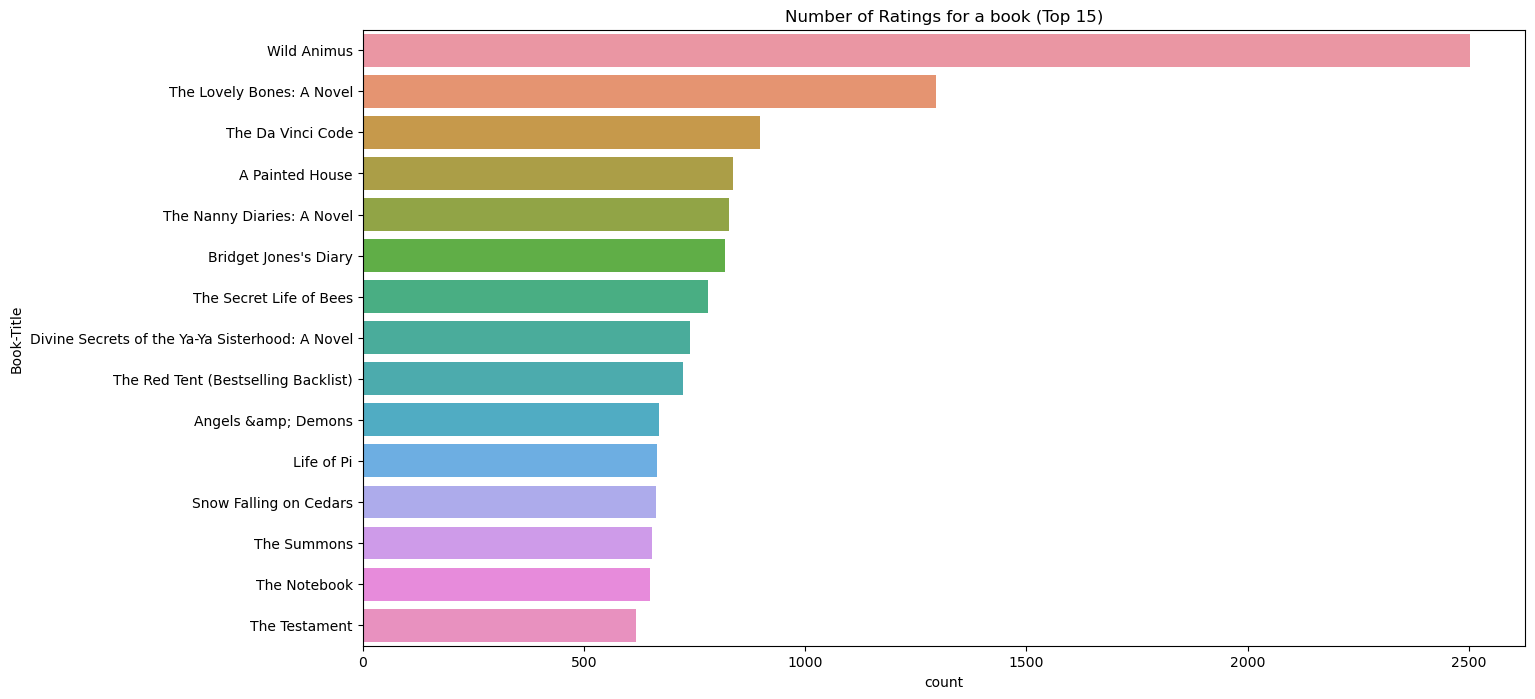

In [70]:
# after merging the datsets
plt.figure(figsize=(15,8))
sns.countplot(y="Book-Title", data=dataset, order=dataset['Book-Title'].value_counts().index[0:15])
plt.title("Number of Ratings for a book (Top 15)")
plt.show()

In [71]:
# recommendation system

In [77]:
bookName = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))

Enter a book name: Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Enter number of books to recommend: 3


In [78]:
# popularity based

In [79]:
def popularity_based(dataframe, n):
    if n >= 1 and n <= len(dataframe):
        data = pd.DataFrame(dataframe.groupby('ISBN')['Book-Rating'].count()).sort_values('Book-Rating', ascending=False).head(n)
        result = pd.merge(data, Book_ds, left_index = True,right_index=True)
        return result
    return "Invalid number of books entered!!"

In [80]:
print("Top", number, "Popular books are: ")
popularity_based(dataset1, number)

Top 3 Popular books are: 


,Book-Rating,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher


In [81]:
# popularity based (top in given place)

In [82]:
def search_unique_places(dataframe, place):
    place = place.lower()

    if place in list(dataframe['City'].unique()):
        return dataframe[dataframe['City'] == place]
    elif place in list(dataframe['State'].unique()):
        return dataframe[dataframe['State'] == place]
    elif place in list(dataframe['Country'].unique()):
        return dataframe[dataframe['Country'] == place]
    else:
        return "Invalid Entry"

In [83]:
place = input("Enter the name of place: ")
data = search_unique_places(dataset1, place)

if isinstance(data, pd.DataFrame):
    data = popularity_based(data, number)

data

Enter the name of place: India


,Book-Rating,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher


In [84]:
# books by same author, publisher of given book

In [85]:
def printBook(k, n):
    z = k['Book-Title'].unique()
    for x in range(len(z)):
        print(z[x])
        if x >= n-1:
            break

In [86]:
def get_books(dataframe, name, n):
    print("\nBooks by same Author:\n")
    au = dataframe['Book-Author'].unique()

    data = dataset1[dataset1['Book-Title'] != name]

    if au[0] in list(data['Book-Author'].unique()):
        k2 = data[data['Book-Author'] == au[0]]
    k2 = k2.sort_values(by=['Book-Rating'])
    printBook(k2, n)

    print("\n\nBooks by same Publisher:\n")
    au = dataframe['Publisher'].unique()

    if au[0] in list(data['Publisher'].unique()):
        k2 = pd.DataFrame(data[data['Publisher'] == au[0]])
    k2=k2.sort_values(by=['Book-Rating']) 
    printBook(k2, n)

In [87]:
if bookName in list(dataset1['Book-Title'].unique()):
    d = dataset1[dataset1['Book-Title'] == bookName]
    get_books(d, bookName, number)
else:
    print("Invalid Book Name!!")


Books by same Author:

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter y el cÃ¡liz de fuego
Harry Potter and the Chamber of Secrets (Book 2)


Books by same Publisher:

The Seeing Stone
The Slightly True Story of Cedar B. Hartley: Who Planned to Live an Unusual Life
Harry Potter and the Chamber of Secrets (Harry Potter)


In [88]:
# collaborative filtering

In [89]:
df = pd.DataFrame(dataset1['Book-Title'].value_counts())
df['Total-Ratings'] = df['Book-Title']
df['Book-Title'] = df.index
df.reset_index(level=0, inplace=True)
df = df.drop('index',axis=1)

df = dataset1.merge(df, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
df = df.drop(['Year-Of-Publication','Publisher','Age','City','State','Country'], axis=1)

popularity_threshold = 50
popular_book = df[df['Total-Ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)

In [90]:
testdf = pd.DataFrame()
testdf['ISBN'] = popular_book['ISBN']
testdf['Book-Rating'] = popular_book['Book-Rating']
testdf['User-ID'] = popular_book['User-ID']
testdf = testdf[['User-ID','Book-Rating']].groupby(testdf['ISBN'])

In [106]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity

listOfDictonaries=[]
indexMap = {}
reverseIndexMap = {}
ptr=0

for groupKey in testdf.groups.keys():
    tempDict={}
    groupDF = testdf.get_group(groupKey)
    for i in range(0,len(groupDF)):
        tempDict[groupDF.iloc[i,0]] = groupDF.iloc[i,1]
    indexMap[ptr]=groupKey
    reverseIndexMap[groupKey] = ptr
    ptr=ptr+1
    listOfDictonaries.append(tempDict)

dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictonaries)
pairwiseSimilarity = cosine_similarity(vector)

In [96]:
def printBookDetails(bookID):
    print(dataset1[dataset1['ISBN']==bookID]['Book-Title'].values[0])

def getTopRecommandations(bookID):
    collaborative = []
    row = reverseIndexMap[bookID]
    print("Input Book:")
    printBookDetails(bookID)
    
    print("\nRECOMMENDATIONS:\n")
    
    mn = 0
    similar = []
    for i in np.argsort(pairwiseSimilarity[row])[:-2][::-1]:
          if dataset1[dataset1['ISBN']==indexMap[i]]['Book-Title'].values[0] not in similar:
                if mn>=number:
                      break
                mn+=1
                similar.append(dataset1[dataset1['ISBN']==indexMap[i]]['Book-Title'].values[0])
                printBookDetails(indexMap[i])
                collaborative.append(dataset1[dataset1['ISBN']==indexMap[i]]['Book-Title'].values[0])
    return collaborative

In [97]:
k = list(dataset1['Book-Title'])
m = list(dataset1['ISBN'])

collaborative = getTopRecommandations(m[k.index(bookName)])

Input Book:
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

RECOMMENDATIONS:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Order of the Phoenix (Book 5)


In [112]:
#correlation based

In [113]:
popularity_threshold = 50

user_count = dataset1['User-ID'].value_counts()
data = dataset1[dataset1['User-ID'].isin(user_count[user_count >= popularity_threshold].index)]
rat_count = data['Book-Rating'].value_counts()
data = data[data['Book-Rating'].isin(rat_count[rat_count >= popularity_threshold].index)]

matrix = data.pivot_table(index='User-ID', columns='ISBN', values = 'Book-Rating').fillna(0)

In [114]:
average_rating = pd.DataFrame(dataset1.groupby('ISBN')['Book-Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(rating_ds.groupby('ISBN')['Book-Rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,Book-Rating,ratingCount
ISBN,,
0971880107,4.390706,2502
0316666343,8.185290,1295
0385504209,8.426230,884
0060928336,7.887500,732
0312195516,8.182768,723


In [115]:
isbn = Book_ds.loc[Book_ds['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
row = matrix[isbn]
correlation = pd.DataFrame(matrix.corrwith(row), columns = ['Pearson Corr'])
corr = correlation.join(average_rating['ratingCount'])

res = corr.sort_values('Pearson Corr', ascending=False).head(number+1)[1:].index
corr_books = pd.merge(pd.DataFrame(res, columns = ['ISBN']), Book_ds, on='ISBN')
print("\n Recommended Books: \n")
corr_books


 Recommended Books: 



,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic
1,0439136369,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,Scholastic
2,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic


In [ ]:
# content based

In [116]:
popularity_threshold = 80
popular_book = df[df['Total-Ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)
popular_book.shape

(44652, 6)

In [119]:
tf = TfidfVectorizer(ngram_range=(1, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(popular_book['Book-Title'])
tfidf_matrix.shape

(44652, 1112)

In [120]:
normalized_df = tfidf_matrix.astype(np.float32)
cosine_similarities = cosine_similarity(normalized_df, normalized_df)
cosine_similarities.shape

(44652, 44652)

In [123]:
print("Recommended Books:\n")
isbn = Book_ds.loc[Book_ds['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
content = []

idx = popular_book.index[popular_book['ISBN'] == isbn].tolist()[0]
similar_indices = cosine_similarities[idx].argsort()[::-1]
similar_items = []
for i in similar_indices:
    if popular_book['Book-Title'][i] != bookName and popular_book['Book-Title'][i] not in similar_items and len(similar_items) < number:
        similar_items.append(popular_book['Book-Title'][i])
        content.append(popular_book['Book-Title'][i])

for book in similar_items:
    print(book)

Recommended Books:

Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Chamber of Secrets (Book 2)


In [124]:
# Hybrid approch

In [125]:
import warnings
warnings.filterwarnings("ignore")

In [126]:
z = list()
k = float(1/number)
for x in range(number):
      z.append(1-k*x)

dictISBN = {}
for x in collaborative:
      dictISBN[x] = z[collaborative.index(x)]

for x in content:
    if x not in dictISBN:
        dictISBN[x] = z[content.index(x)]
    else:
        dictISBN[x] += z[content.index(x)]

ISBN = dict(sorted(dictISBN.items(),key=operator.itemgetter(1),reverse=True))
w=0
print("Input Book:\n")
print(bookName)
print("\nRecommended Books:\n")
for x in ISBN.keys():
    if w>=number:
        break
    w+=1
    print(x)

Input Book:

Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

Recommended Books:

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Sorcerer's Stone (Book 1)
